# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# Bài 4 - Giảm sai số Monte Carlo

**Nội dung**

* [Minh họa mở đầu](#minh_hoa)
* [Ước lượng và sai số Monte Carlo](#sai_so_Monte_Carlo)
* [Phương pháp lấy mẫu quan trọng](#lay_mau_quan_trong)
* [Phương pháp biến đối nghịch](#bien_doi_nghich)
* [Phương pháp biến kiểm soát](#bien_kiem_soat)
* [Một số ứng dụng cho suy diễn thống kê](#ung_dung_thong_ke)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## <a name="minh_hoa"/>Minh họa mở đầu

**Yêu cầu.** Tính tích phân
$$
I = \int_{0}^{\infty}x^{0.9}e^{-x}dx.
$$

In [2]:
import scipy.special
round(scipy.special.gamma(1.9), 4)

0.9618

**Phương án 1**

In [3]:
np.random.seed(1)

N = 100
U = np.random.uniform(size=N)
X = -np.log(U)
Y = X**0.9

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)
print(round(N*(ese/0.001)**2))

1.0594
0.10926867023842905
1193964


**Phương án 2**

In [4]:
np.random.seed(1)

U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)
print(round(N*(ese/10**(-3))**2))

0.9573
0.012065811885874236
14558


In [5]:
np.random.seed(1)

N = 15000
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

I_hat = np.mean(Y)
s = np.std(Y, ddof=1)
ese = s/np.sqrt(len(Y))

print(round(I_hat, 4))
print(ese)

0.9618
0.0009217217301816865


## <a name="sai_so_Monte_Carlo"/>Ước lượng và sai số Monte Carlo

Ví dụ, ước lượng $E(\sin(X)^2)$ với $X \sim \mathcal{N}(0, 1)$.

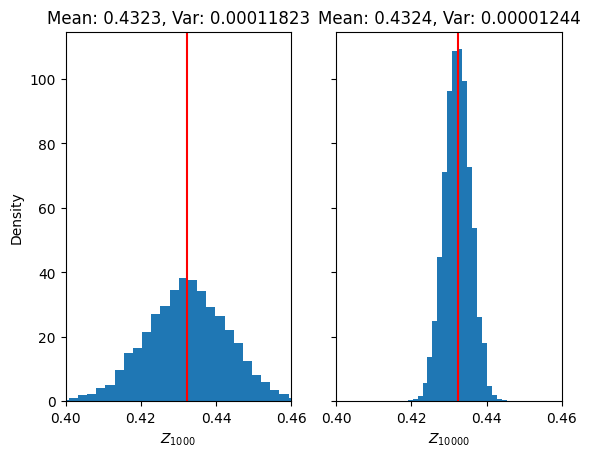

In [6]:
def MC_estimator_sinX2(N):
    X = np.random.normal(size=N)
    Y = np.sin(X)**2
    return np.mean(Y)

MC_est1 = np.fromiter((MC_estimator_sinX2(1000) for _ in range(5000)), dtype=float)
MC_est2 = np.fromiter((MC_estimator_sinX2(10000) for _ in range(5000)), dtype=float)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(MC_est1, density=True, bins=30)
ax1.axvline(x=np.mean(MC_est1), color="red")
ax1.set_xlim(0.4, 0.46)
ax1.set_title("Mean: {0:.4f}, Var: {1:.8f}".format(np.mean(MC_est1), np.var(MC_est1, ddof=1)))
ax1.set_ylabel("Density")
ax1.set_xlabel("$Z_{1000}$")
ax2.hist(MC_est2, density=True, bins=20)
ax2.axvline(x=np.mean(MC_est2), color="red")
ax2.set_xlim(0.4, 0.46)
ax2.set_title("Mean: {0:.4f}, Var: {1:.8f}".format(np.mean(MC_est2), np.var(MC_est2, ddof=1)))
ax2.set_xlabel("$Z_{10000}$")
#plt.savefig("MC_error.pdf", bbox_inches="tight")
plt.show()

Khoảng tin cậy cho ước lượng Monte Carlo.

In [7]:
def MC_conf_int(Y, alpha=0.05):
    N = len(Y)
    Z_MC = np.mean(Y)
    qa = stats.t(N - 1).ppf(1 - alpha/2)
    sigma = np.std(Y, ddof=1)
    
    return Z_MC + sigma*qa/np.sqrt(N) * np.array([-1, 1])

In [8]:
# Minh họa mở đầu - Phương án 1
np.random.seed(1)

N = 100
U = np.random.uniform(size=N)
X = -np.log(U)
Y = X**0.9

np.round(MC_conf_int(Y), 4)

array([0.8426, 1.2762])

In [9]:
# Minh họa mở đầu - Phương án 2
np.random.seed(1)

U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

np.round(MC_conf_int(Y), 4)

array([0.933 , 0.9815])

In [10]:
# Minh họa mở đầu - Phương án 2
np.random.seed(1)

N = 15000
U = np.random.uniform(size=N)
X = -np.log(U[:N//2]*U[N//2:])
Y = 1/X**0.1

np.round(MC_conf_int(Y), 4)

array([0.96  , 0.9636])

## <a name="lay_mau_quan_trong"/>Phương pháp lấy mẫu quan trọng

Minh họa mở đầu đã dùng phương pháp lấy mẫu quan trọng trong phương án 2 để giảm sai số. 

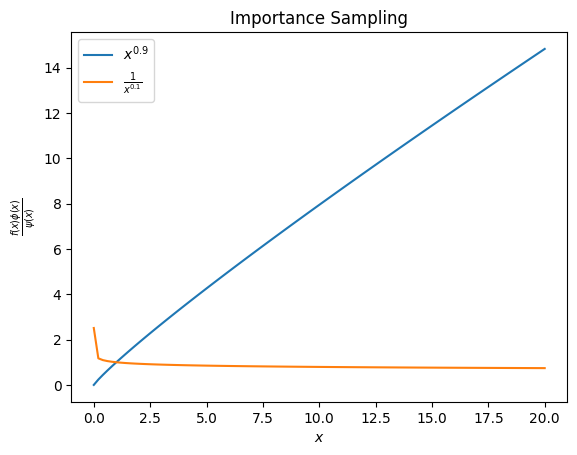

In [11]:
x = np.linspace(0.0001, 20, 100)

plt.plot(x, x**0.9, label="$x^{0.9}$")
plt.plot(x, 1/x**0.1, label=r"$\frac{1}{x^{0.1}}$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel(r"$\frac{f(x)\phi(x)}{\psi(x)}$")
plt.title("Importance Sampling")
#plt.savefig("IS_var_red.pdf", bbox_inches="tight")
plt.show()

## <a name="bien_doi_nghich"/>Phương pháp biến đối nghịch

**Ví dụ 1.** Cho $X \sim \mathcal{N}(0, 1)$, ước lượng xác suất 
$$
    p = P(X \in [1, 3]) = E(\mathbb{I}_{[1, 3]}(X)).
$$ 

In [12]:
N = 100000

X = np.random.normal(size=N)
X_prime = -X

Y_MC = np.logical_and(1 <= X, X <= 3).astype("float")
Y_MC_prime = np.logical_and(1 <= X_prime, X_prime <= 3).astype("float")
Y_AV = Y_MC + Y_MC_prime 

Z_MC = np.mean(Y_MC)
Z_AV = np.mean(Y_AV[:N//2])/2

eMSE_MC = np.var(Y_MC)/N
eMSE_AV = np.var(Y_AV[:N//2])/(2*N)

erho = np.corrcoef(Y_MC, Y_MC_prime)[0, 1]
p = stats.norm.cdf(3) - stats.norm.cdf(1)
rho = -p/(1 - p)

print(f"Z_MC: {Z_MC:.4f}, Z_AV: {Z_AV:.4f}")
print(f"rho: {rho:.4f}, estimated rho: {erho:.4f}")
print(f"MSE ratio: {1 + rho:.4f}, estimated MSE ratio: {eMSE_AV/eMSE_MC:.4f}, {(1 + erho):.4f}")

Z_MC: 0.1577, Z_AV: 0.1584
rho: -0.1867, estimated rho: -0.1857
MSE ratio: 0.8133, estimated MSE ratio: 0.8150, 0.8143


In [96]:

N = 10000

X = np.random.uniform(1/100, 1 / 49, N)

weights = 3 * X**2/2401

P = np.mean(weights)

P, (1/10)**6

(3.006747023175411e-07, 1.0000000000000004e-06)

**Ví dụ 2.** Tính tích phân
$$
    I = \int_{0}^{\infty}x^{0.9}e^{-x}dx.
$$

In [13]:
N = 100000

U = np.random.uniform(size=N)
X = -np.log(U)
X_prime = -np.log(1 - U)

Y_MC = X**0.9
Y_MC_prime = X_prime**0.9
Y_AV = Y_MC + Y_MC_prime 

Z_MC = np.mean(Y_MC)
Z_AV = np.mean(Y_AV[:N//2])/2

eMSE_MC = np.var(Y_MC)/N
eMSE_AV = np.var(Y_AV[:N//2])/(2*N)

erho = np.corrcoef(Y_MC, Y_MC_prime)[0, 1]

print(f"Z_MC: {Z_MC:.4f}, Z_AV: {Z_AV:.4f}")
print(f"Estimated rho: {erho:.4f}")
print(f"Estimated MSE ratio: {eMSE_AV/eMSE_MC:.4f}, {(1 + erho):.4f}")

Z_MC: 0.9617, Z_AV: 0.9609
Estimated rho: -0.7130
Estimated MSE ratio: 0.2844, 0.2870


## <a name="bien_kiem_soat"/>Phương pháp biến kiểm soát

Tính tích phân $I = \int_0^1 e^{x^2}dx$.

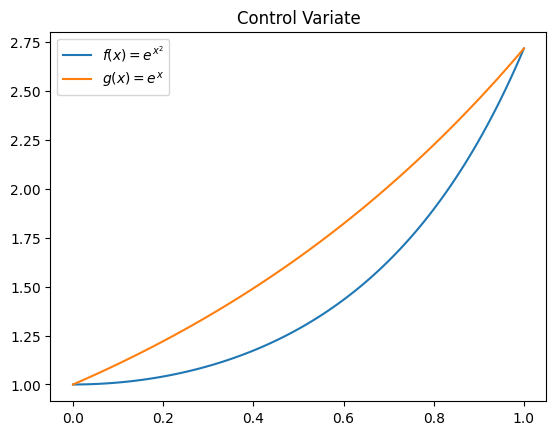

In [14]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x**2), label="$f(x) = e^{x^2}$")
plt.plot(x, np.exp(x), label="$g(x) = e^x$")
plt.legend()
plt.title("Control Variate")
#plt.savefig("CV_var_red.pdf", bbox_inches="tight")
plt.show()

In [15]:
N = 10000

np.random.seed(1)
X = np.random.uniform(size=N)
f_X = np.exp(X**2)
g_X = np.exp(X)
fg_X = f_X - g_X

Z_MC = np.mean(f_X)
Z_CV = np.mean(fg_X) + (np.exp(1) - 1)

print(f"Z_MC: {Z_MC:.4f}, Z_CV: {Z_CV:.4f}")
print(f"Estimated MSE ratio: {np.var(fg_X)/np.var(f_X):.4f}")

Z_MC: 1.4580, Z_CV: 1.4619
Estimated MSE ratio: 0.0623


## <a name="ung_dung_thong_ke"/>Một số ứng dụng cho suy diễn thống kê

### Ước lượng điểm

In [16]:
def bias_rho(N, n, rho):
    S = 0
    for _ in range(N):
        X = np.random.normal(size=n)
        Eta = np.random.normal(size=n)
        Y = rho*X + np.sqrt(1 - rho**2)*Eta
        S = S + stats.pearsonr(X, Y)[0]

    return (S/N - rho)

n = 10
N = 1000
rho = np.linspace(-1, 1, num=40) # num=40
bias = np.fromiter((bias_rho(N, n, r) for r in rho), float)

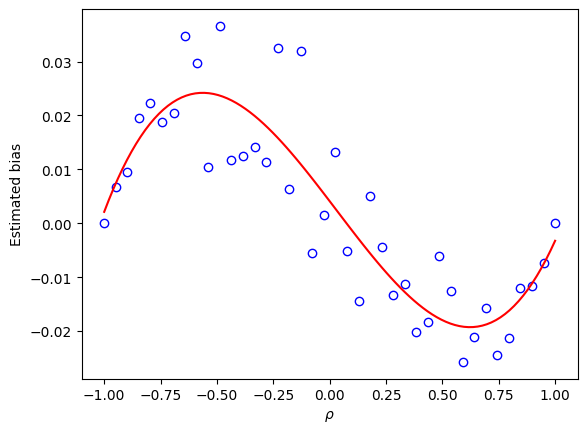

In [17]:
from scipy.interpolate import UnivariateSpline

spl = UnivariateSpline(rho, bias)
spl_r = np.linspace(-1, 1, 100)

plt.plot(rho, bias, "bo", mfc="none")
plt.plot(spl_r, spl(spl_r), color="red")
plt.xlabel(r"$\rho$")
plt.ylabel("Estimated bias")
#plt.savefig("bias_rho_estimated.pdf", bbox_inches="tight")
plt.show()

### Khoảng tin cậy

In [18]:
def confint_lambda(N, n, lam, alpha=0.05):
    k = 0
    for _ in range(N):
        X = np.random.poisson(lam, size=n)
        mu, sigma = np.mean(X), np.std(X, ddof=1)
        epsilon = stats.t.ppf(1-alpha/2, n - 1)*sigma/np.sqrt(n)
        U, V = mu - epsilon, mu + epsilon
        if U <= lam <= V:
            k = k + 1

    return (k/N)

n = 10
N = 1000
alpha = 0.05

lams = np.linspace(0.001, 1, num=40) # num=40
conf = np.fromiter((confint_lambda(N, n, lam, alpha) for lam in lams), float)

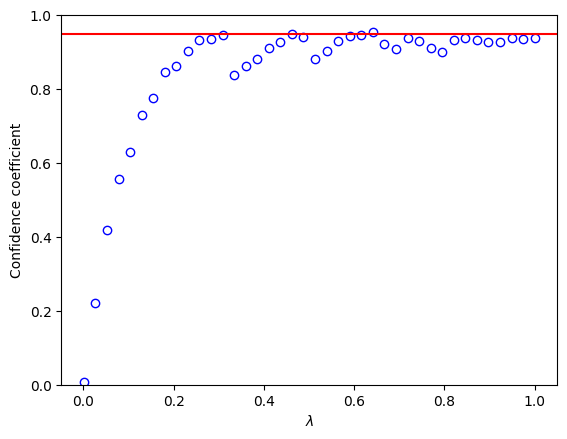

In [19]:
plt.plot(lams, conf, "bo", mfc="none")
plt.axhline(y=1 - alpha, color="red")
plt.ylim(0, 1)
plt.xlabel(r"$\lambda$")
plt.ylabel("Confidence coefficient")
#plt.savefig("confint_lambda.pdf", bbox_inches="tight")
plt.show()